In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
import numpy as np
import pandas as pd
import warnings

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

import matplotlib.pyplot as plt

In [12]:
warnings.filterwarnings("ignore")

## 2

In [13]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [14]:
image_dir = "/content/drive/MyDrive/DM1/Images"
annotation_dir = "/content/drive/MyDrive/DM1/Annotation"

In [15]:
class_names = "Bedlington_terrier	bizan_hound	komondor flat-coated_retriever".split("\t")

In [16]:
class_names

['Bedlington_terrier', 'bizan_hound', 'komondor flat-coated_retriever']

In [17]:
class_paths = ['n02093647-Bedlington_terrier','n02091244-Ibizan_hound','n02105505-komondor','n02099267-flat-coated_retriever']

In [18]:
new_dir = "/content/drive/MyDrive/DM1/processed"

In [19]:
def resize_crop_image(image_path,image_filename,annotation_path,annotation_filename):
  bnd_box = []
  im = Image.open(os.path.join(image_path,image_filename))
  annotation = ET.parse(os.path.join(annotation_path,annotation_filename))
  annotation_root = annotation.getroot()
  for child in annotation_root.findall('object')[0].findall('bndbox')[0]:
    bnd_box.append(int(child.text))
  im = im.crop(bnd_box)
  im = im.resize((128,128))
  return im
new_dir = "/content/drive/MyDrive/DM1/processed/"
if not os.path.exists(new_dir):
  os.mkdir(new_dir)
for class_ in class_paths:
  image_class_path = os.path.join(image_dir,class_)
  annotation_class_path = os.path.join(annotation_dir,class_)
  images = os.listdir(image_class_path)
  annotations = os.listdir(annotation_class_path)
  new_class_dir = os.path.join("/content/drive/MyDrive/DM1/processed/",class_)
  images.sort()
  annotations.sort()
  if not os.path.exists(new_class_dir):
    os.mkdir(new_class_dir)
  for image_filename ,annotation_filename in zip(images,annotations):
    im = resize_crop_image(image_class_path,image_filename,annotation_class_path,annotation_filename)
    im.save(os.path.join(new_class_dir,image_filename))

## 2

In [20]:
import random
import cv2 as cv

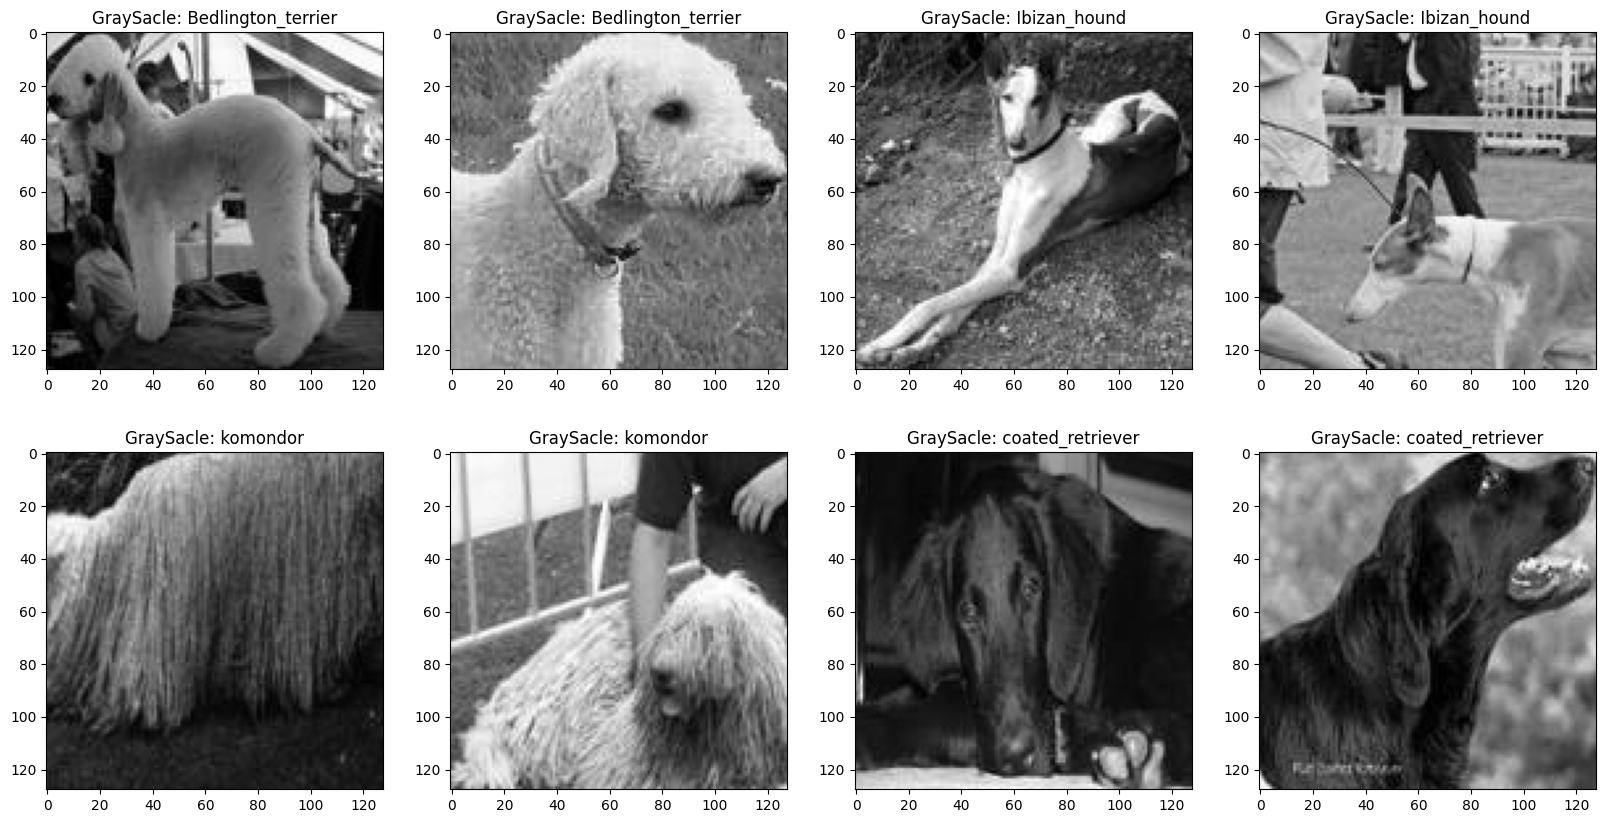

In [51]:
processed_class = os.listdir("/content/drive/MyDrive/DM1/processed")
images_to_convert =[]
for class_ in processed_class:
  filenames =random.choices(os.listdir(os.path.join("/content/drive/MyDrive/DM1/processed",class_)),k=2)
  for filename in filenames:
    images_to_convert.append(os.path.join(class_,filename))
fig, axes = plt.subplots(2,4, figsize=(20,10))
for ax,filename in zip(axes.flat,images_to_convert):
  img = cv.imread(os.path.join("/content/drive/MyDrive/DM1/processed",filename))
  gray_sacle = rgb2gray(img)
  ax.imshow(gray_sacle, cmap=plt.cm.gray)
  ax.set_title("GraySacle: " + filename.split("/")[0].split("-")[-1])
plt.show()

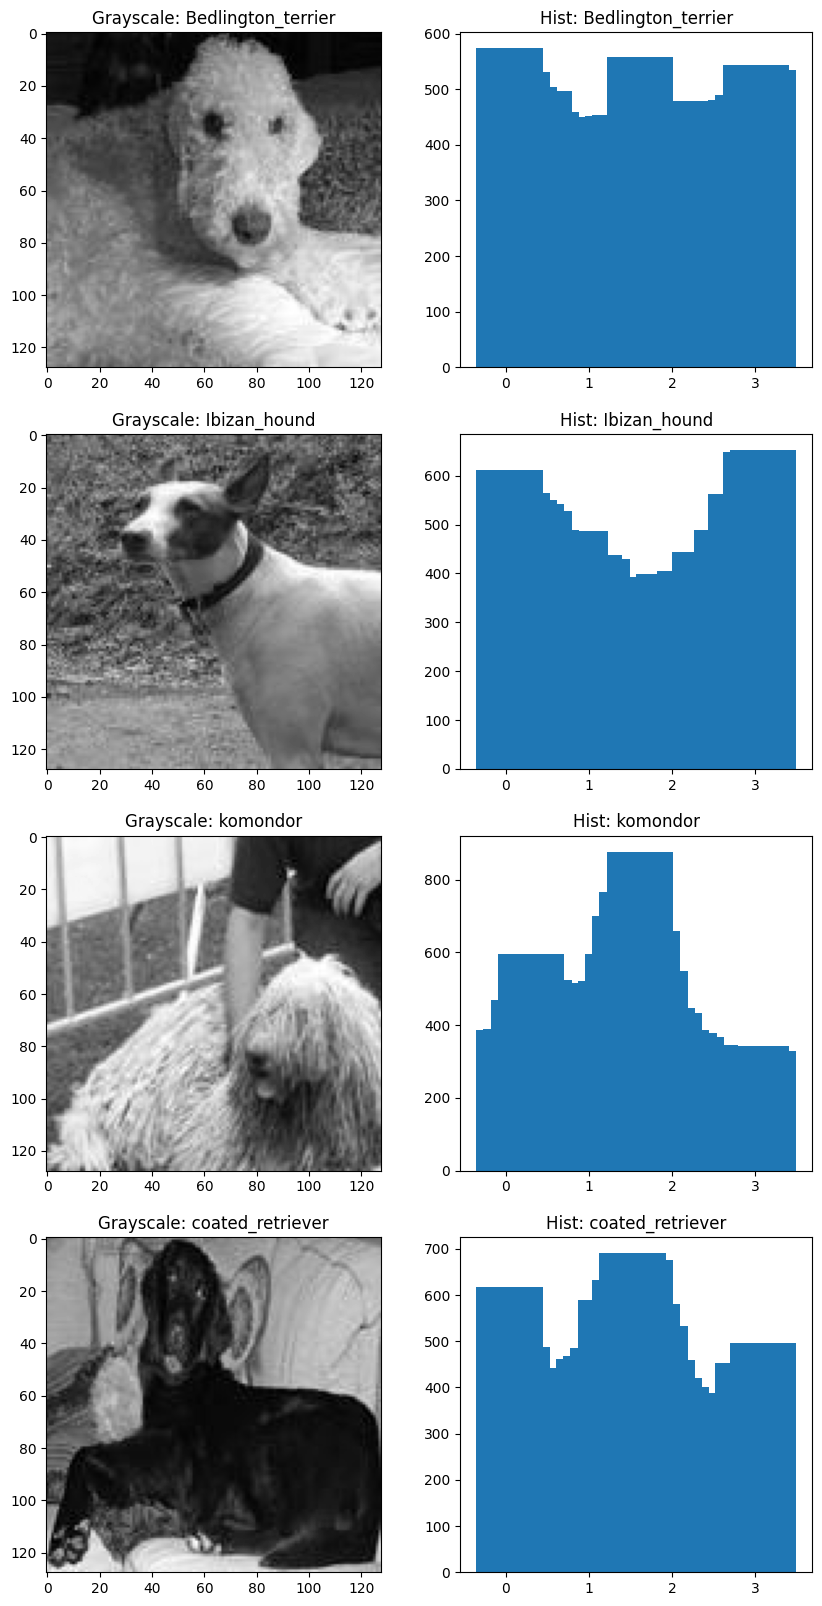

In [24]:
processed_class = os.listdir("/content/drive/MyDrive/DM1/processed")
images_to_angle =[]
for class_ in processed_class:
  filenames =random.choices(os.listdir(os.path.join("/content/drive/MyDrive/DM1/processed",class_)),k=1)
  for filename in filenames:
    images_to_angle.append(os.path.join(class_,filename))
def angle(dx, dy):
  """Calculate the angles between horizontal and vertical
  operators."""
  return np.mod(np.arctan2(dy, dx), np.pi)
fig, axes = plt.subplots(4,2, figsize=(10,20))
ax=axes.flat
c =0
for i in range(len(images_to_angle)):
  img = cv.imread(os.path.join("/content/drive/MyDrive/DM1/processed",images_to_angle[i]))
  gray_sacle = rgb2gray(img)
  angle_sobel = angle(filters.sobel_h(gray_sacle),
  filters.sobel_v(gray_sacle))
  hist,bins = exposure.histogram(angle_sobel,nbins=36)
  ax[c].imshow(gray_sacle, cmap=plt.cm.gray)
  ax[c+1].bar(bins,hist)
  ax[c].set_title("Grayscale: "+images_to_angle[i].split("/")
  [0].split("-")[-1])
  ax[c+1].set_title("Hist: "+images_to_angle[i].split("/")
  [0].split("-")[-1])
  c+=2
plt.show()

In [30]:
class_one_images

'n02093647_1081.jpg'

In [39]:
processed_class = os.listdir("/content/drive/MyDrive/DM1/processed")
class_one_images =random.choices(os.listdir(os.path.join("/content/drive/MyDrive/DM1/processed",processed_class[0])),k=1)[0]
class_two_images =random.choices(os.listdir(os.path.join("/content/drive/MyDrive/DM1/processed",processed_class[-1])),k=1)[0]

temp_path = os.path.join("/content/drive/MyDrive/DM1/processed",processed_class[0])
img = cv.imread(os.path.join(temp_path,class_one_images))
gray_sacle = rgb2gray(img)
angle_sobel = angle(filters.sobel_h(gray_sacle),
filters.sobel_v(gray_sacle))
hist,bins = exposure.histogram(angle_sobel,nbins=36)
class_one_hist = (hist,bins)

temp_path = os.path.join("/content/drive/MyDrive/DM1/processed",processed_class[-1])
img = cv.imread(os.path.join(temp_path,class_two_images))
gray_sacle = rgb2gray(img)
angle_sobel = angle(filters.sobel_h(gray_sacle),
filters.sobel_v(gray_sacle))
hist,bins = exposure.histogram(angle_sobel,nbins=36)
class_two_hist = (hist,bins)

def euclidean_distance(x,y):
  return np.sqrt(np.sum((x-y)**2))
def manhattan_distance(x,y):
  return np.sum(abs(x-y))
def cosine_distance(x,y):
  return np.sum(x+y)/(np.sqrt(np.sum(x**2))*np.sqrt(np.sum(y**2)))

print("Euclidean Distannce diffrent class:",euclidean_distance(class_one_hist[0][1],class_two_hist[0][1]))
print("Manhattan distance diffrent class :",manhattan_distance(class_one_hist[0][1],class_two_hist[0][1]))
print("Cosine distance different class:",cosine_distance(class_one_hist[0][1],class_two_hist[0][1]))




Euclidean Distannce diffrent class: 22.0
Manhattan distance diffrent class : 22
Cosine distance different class: 0.004427400909968019


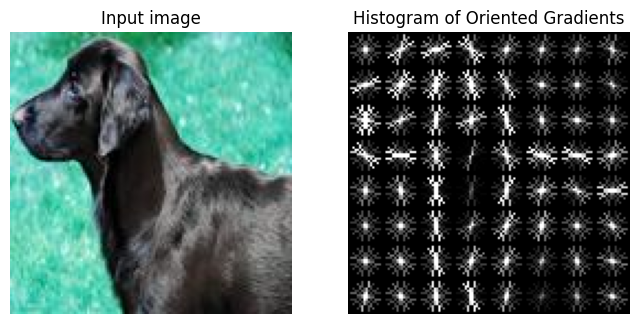

In [38]:
from skimage.feature import hog
image = cv.imread("/content/drive/MyDrive/DM1/processed/n02099267-flat-coated_retriever/n02099267_1018.jpg")
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True,channel_axis=-1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)

ax2.set_title('Histogram of Oriented Gradients')
plt.show()

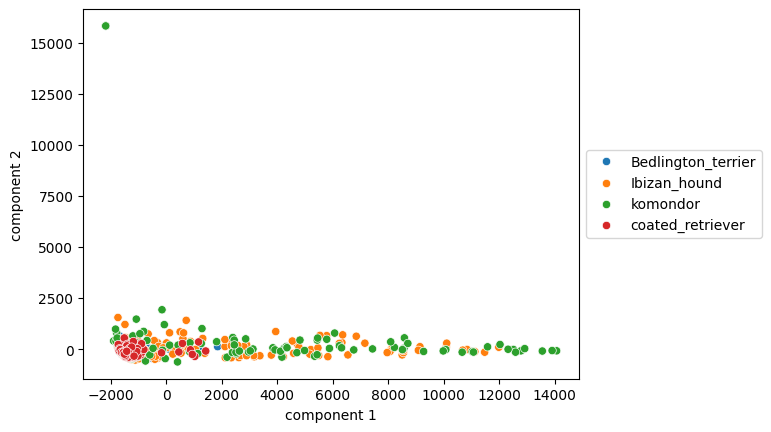

In [40]:
processed_class = os.listdir("/content/drive/MyDrive/DM1/processed")
import pandas as pd
columns=[i for i in range(36)] + ["label"]
df = pd.DataFrame(columns=columns)
for class_ in processed_class:
  class_path = os.path.join("/content/drive/MyDrive/DM1/processed",class_)
  for filename in os.listdir(class_path):
    img = cv.imread(os.path.join(class_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    df.loc[len(df)] = list(hist)+[class_.split("-")[-1]]

X_train = np.array(df[df.columns[:-1]])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train)
df_pca = pd.DataFrame(data_pca)
df_pca['label'] = df['label']
import seaborn as sns
sns.scatterplot(x=df_pca[0],y=df_pca[1],hue=df_pca['label'])
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Note:**: None of the classes are visually seprable

Count Vectorizer dimensionality: (1695, 6500)
TF-IDF Vectorizer dimensionality: (1695, 6500)


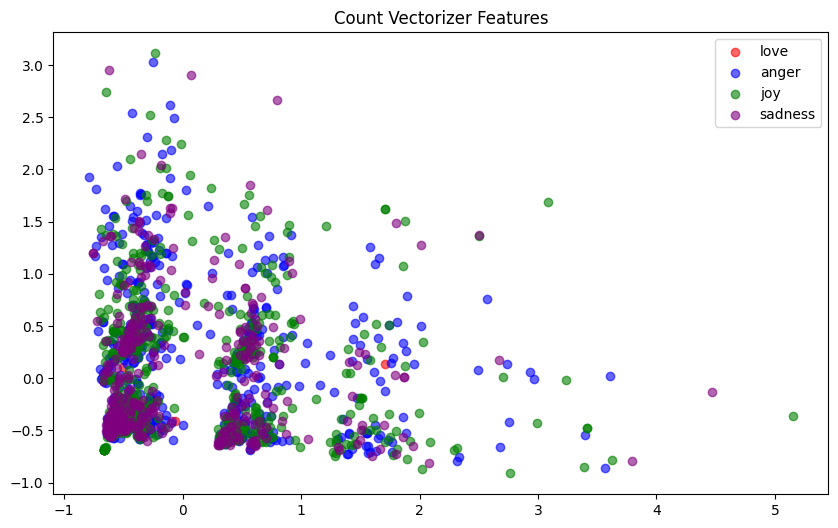

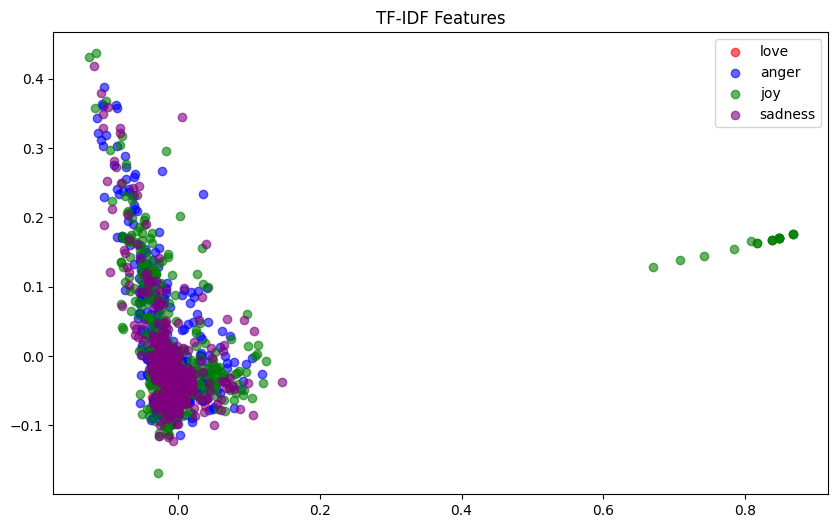

In [41]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import json
from typing import List, Dict

def load_data(file_path):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    return data

def get_dominant_emotions(tweet_data: Dict) -> List[str]:
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy',
                'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
    return [emotion for emotion in emotions if tweet_data[emotion]]

def extract_features_and_labels(data: List[Dict], selected_emotions: List[str]):

    filtered_data = []
    filtered_labels = []

    for tweet in data:
        tweet_emotions = get_dominant_emotions(tweet)
        selected_emotions_present = [e for e in tweet_emotions if e in selected_emotions]

        if len(selected_emotions_present) == 1:
            filtered_data.append(tweet['Tweet'])
            filtered_labels.append(selected_emotions_present[0])


    count_vectorizer = CountVectorizer()
    tfidf_vectorizer = TfidfVectorizer()


    count_features = count_vectorizer.fit_transform(filtered_data)
    tfidf_features = tfidf_vectorizer.fit_transform(filtered_data)

    return count_features, tfidf_features, filtered_labels

def reduce_dimensions(features):
    pca = PCA(n_components=2)
    return pca.fit_transform(features.toarray())

def plot_reduced_features(reduced_features, labels, title):
    plt.figure(figsize=(10, 6))
    unique_labels = list(set(labels))
    colors = ['red', 'blue', 'green', 'purple']

    for i, label in enumerate(unique_labels):
        mask = [l == label for l in labels]
        mask_array = np.array(mask)
        plt.scatter(reduced_features[mask_array, 0], reduced_features[mask_array, 1],
                   c=colors[i], label=label, alpha=0.6)

    plt.title(title)
    plt.legend()
    plt.show()


file_paths ='/content/drive/MyDrive/DM1/student_18/train.json'


data = load_data(file_paths)
selected_emotions = ['joy', 'sadness', 'anger', 'love']


count_features, tfidf_features, labels = extract_features_and_labels(data, selected_emotions)



print(f"Count Vectorizer dimensionality: {count_features.shape}")
print(f"TF-IDF Vectorizer dimensionality: {tfidf_features.shape}")


reduced_count = reduce_dimensions(count_features)
reduced_tfidf = reduce_dimensions(tfidf_features)

plot_reduced_features(reduced_count, labels, 'Count Vectorizer Features')
plot_reduced_features(reduced_tfidf, labels, 'TF-IDF Features')



**Note:**: None of the classes are visually separable